In [108]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)
import os

In [109]:
def hist(im):
    print(im.shape)
    hei, w = im.shape
    h = [0] * 256
    for i in range(hei):
        for j in range(w):
            h[int(im[i, j])]+=1
    return h

def plot_histogram(text, h):
    plt.plot(h)
    plt.title(text) #hist of equalized image
    plt.show()
    plt.close()

In [51]:
def bitwise_and(a, b):
    return a & b

In [52]:
def bitwise_or(a, b):
    return a | b

In [53]:
def bitwise_xor(a, b):
    return a ^ b

In [54]:
def bitwise_xand(a, b):
    return ~(a ^ b)

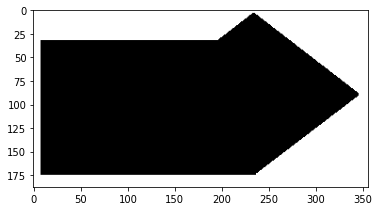

In [55]:
fig_name = "./images/Image_(1a)"
fig_type = ".png"
result_path = "./result/"
img = cv.imread(fig_name+fig_type)
plt.imshow(img)
plt.show()

(188, 356)


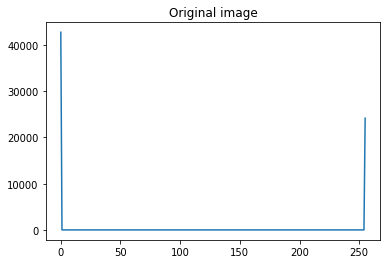

In [56]:
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(img1))

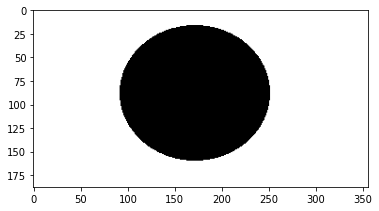

In [57]:
fig_name2 = "./images/Image_(1b)"
fig_type2 = ".png"
result_path = "./result/"
img2 = cv.imread(fig_name2+fig_type2)
plt.imshow(img2)
plt.show()

(188, 356)


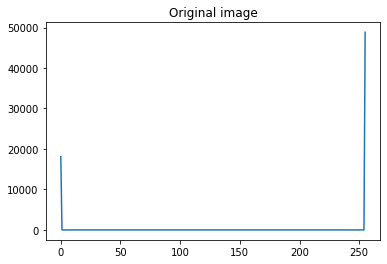

In [60]:
img22 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(img22))

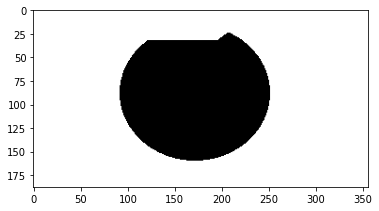

In [61]:
or_img = bitwise_or(img,img2)
plt.imshow(or_img)
plt.show()

(188, 356)


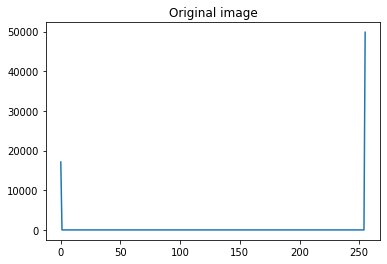

In [62]:
or_img = cv.cvtColor(or_img, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(or_img))

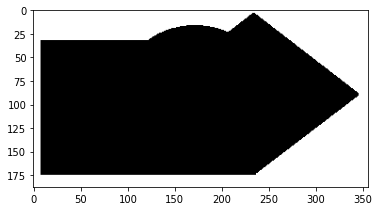

In [63]:
and_img = bitwise_and(img,img2)
plt.imshow(and_img)
plt.show()

(188, 356)


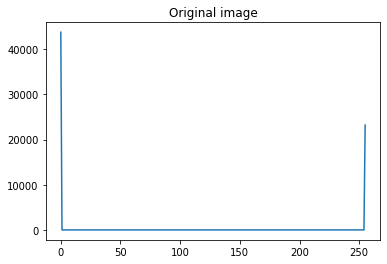

In [64]:
and_img = cv.cvtColor(and_img, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(and_img))

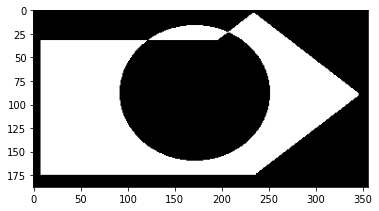

In [65]:
xor_img = bitwise_xor(img,img2)
plt.imshow(xor_img)
plt.show()

(188, 356)


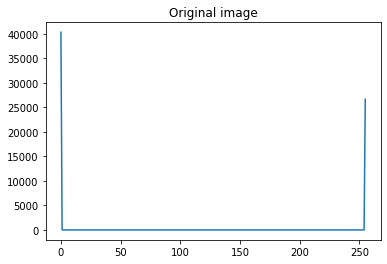

In [66]:
xor_img = cv.cvtColor(xor_img, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(xor_img))

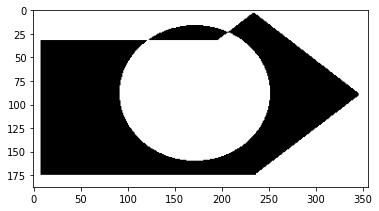

In [67]:
xand_img = bitwise_xand(img,img2)
plt.imshow(xand_img)
plt.show()

(188, 356)


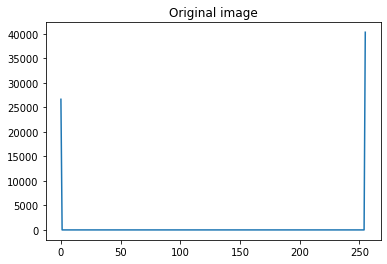

In [68]:
xand_img = cv.cvtColor(xand_img, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(xand_img))

In [69]:
cv.imwrite(result_path + "Image_(1)_and" + fig_type, or_img)
cv.imwrite(result_path + "Image_(1)_or" + fig_type, and_img)
cv.imwrite(result_path + "Image_(1)_xor" + fig_type, xor_img)
cv.imwrite(result_path + "Image_(1)_xand" + fig_type, xand_img)

True

In [70]:
def dilate(image):
    height = len(image)
    width = len(image[0])
    
    new_img = []
    new_img = np.zeros((height,width))
    
    SED= np.array([[0,1,0], [1,1,1],[0,1,0]])
    constant1 = 1
    
    for i in range(constant1, height-constant1):
        for j in range(constant1,width-constant1):
            temp = image[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
            product = temp*SED
            new_img[i,j] = np.max(product)

    return new_img

In [71]:
def dilate_by_frame(image, frame_size):
    for i in range(frame_size):
        image = dilate(image)

    return image

In [72]:
def erode(image, frame_size):
    SE= np.ones((frame_size,frame_size), dtype=np.uint8)
    constant= (frame_size-1)//2
    
    height = len(image)
    width = len(image[0])
    new_img = []
    new_img = np.zeros((height,width))
    
    binary_img = np.zeros((height,width))
    
    for i in range(height):
        for j in range(width):
            if image[i,j].all() > 0:
                binary_img[i,j] = 1
    
    for i in range(constant, height-constant):
        for j in range(constant,width-constant):
            temp= binary_img[i-constant:i+constant+1, j-constant:j+constant+1]
            product= temp*SE
            new_img[i,j]= np.min(product)

    return new_img

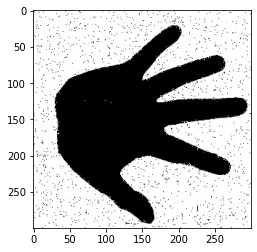

In [122]:
fig_name_2a = "./images/Image_(2a)"
fig_type_2a = ".jpg"
result_path = "./result/"

img_2a = cv.imread(fig_name_2a+fig_type_2a)

plt.imshow(img_2a)
plt.show()

(300, 300)


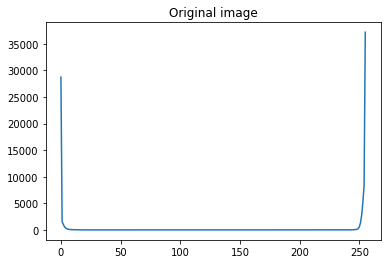

In [123]:
img_2a1 = cv.cvtColor(img_2a, cv.COLOR_BGR2GRAY)
hist_hand_orig = hist(img_2a1)
plot_histogram("Original image", hist_hand_orig)

In [124]:
eroded_img = erode(img_2a, 5)

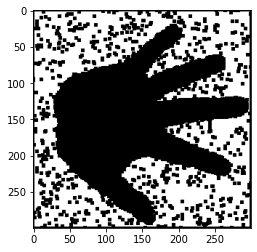

In [125]:
plt.imshow(eroded_img, cmap=plt.cm.gray)
plt.show()

(300, 300)


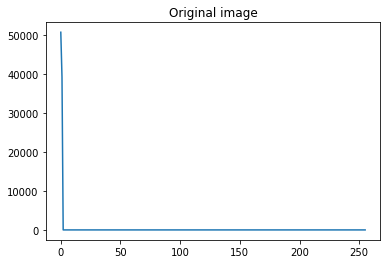

In [127]:
# img_2a1 = cv.cvtColor(eroded_img, cv.COLOR_BGR2GRAY)
hist_eroded_hand = hist(eroded_img)
plot_histogram("Original image", hist_eroded_hand)

(300, 300)


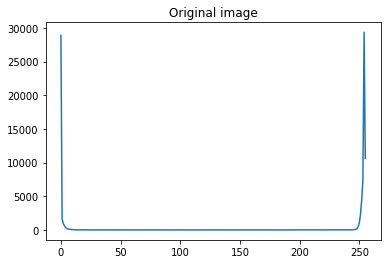

In [131]:
r = img_2a1 - eroded_img
plot_histogram("Original image", hist(r))

In [76]:
cv.imwrite(result_path + "Image_(2a)" + fig_type_2a, eroded_img)

True

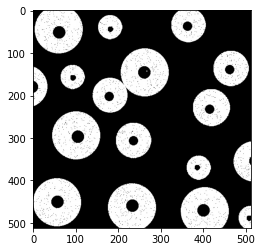

In [115]:
fig_name_3a = "./images/Image_(3a)"
fig_type_3a = ".jpg"
result_path = "./result/"

img_3a = cv.imread(fig_name_3a+fig_type_3a)

plt.imshow(img_3a)
plt.show()

(512, 512)


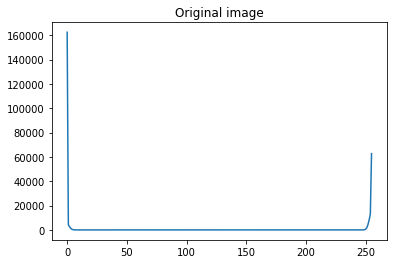

In [116]:
img_2a1 = cv.cvtColor(img_3a, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(img_2a1))

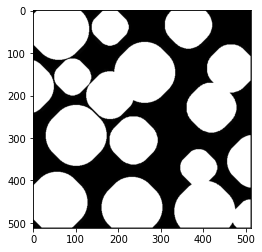

In [117]:
dilated_img_3a = dilate_by_frame(img_3a, 15)
plt.imshow(dilated_img_3a, cmap=plt.cm.gray)
plt.show()

(512, 512)


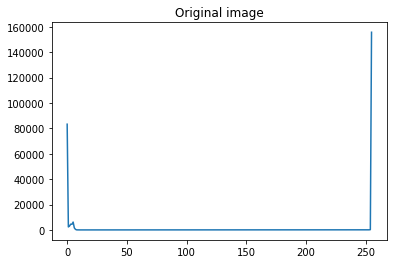

In [118]:
# img_2a1 = cv.cvtColor(dilated_img_3a, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(dilated_img_3a))

In [ ]:
r = img_2a1 - dilated_img_3a
plot_histogram("Original image", hist(r))

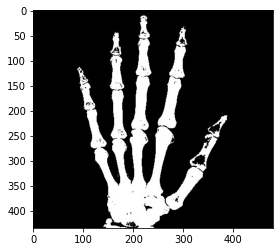

In [96]:
fig_name_4a = "./images/Image_(4a)"
fig_type_4a = ".jpg"
result_path = "./result/"

img_4a = cv.imread(fig_name_4a+fig_type_4a)

plt.imshow(img_4a)
plt.show()

(435, 479)


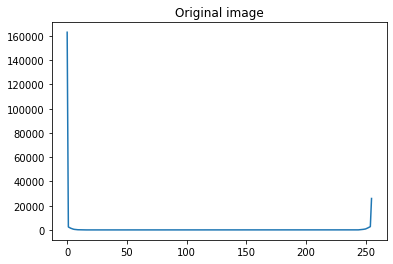

In [98]:
img_2a1 = cv.cvtColor(img_4a, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(img_2a1))

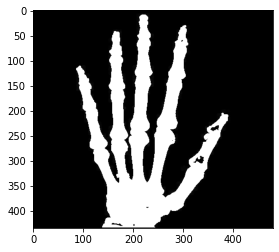

In [119]:
dilated_img_4a = dilate_by_frame(img_4a, 2)
plt.imshow(dilated_img_4a, cmap=plt.cm.gray)
plt.show()

(435, 479)


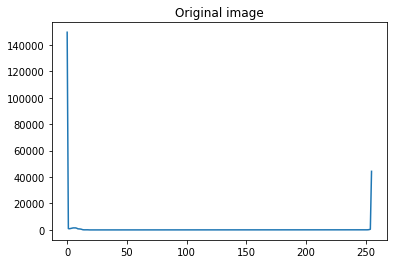

In [120]:
# img_2a1 = cv.cvtColor(dilated_img_4a, cv.COLOR_BGR2GRAY)
plot_histogram("Original image", hist(dilated_img_4a))
# print(dilated_img_4a)